### Importando pacotes e dataset

In [2]:
import os

import matplotlib.pyplot as plt
# import earthpy as et
import numpy as np

import pandas as pd

df = pd.read_csv('83377.csv')

df.head()

,Unnamed: 0,Estacao,Data,Hora,Precipitacao,TempBulboSeco,TempBulboUmido,TempMaxima,TempMinima,UmidadeRelativa,...,PressaoAtmMar,DirecaoVento,VelocidadeVento,Insolacao,Nebulosidade,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Unnamed: 19
0,12132121,83377,21/08/1961,0,NaN,22.6,14.1,27.9,NaN,36.0,...,NaN,NaN,NaN,10.0,NaN,NaN,22.14,36.25,1.366667,NaN
1,12132122,83377,21/08/1961,1200,NaN,23.8,15.2,NaN,13.8,37.0,...,NaN,9.0,1.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,12132123,83377,21/08/1961,1800,NaN,24.2,15.4,NaN,NaN,36.0,...,NaN,14.0,2.6,NaN,7.0,NaN,NaN,NaN,NaN,NaN
3,12132124,83377,22/08/1961,0,NaN,22.6,14.1,29.7,NaN,36.0,...,NaN,0.0,0.0,9.4,5.0,NaN,23.52,28.25,1.033333,NaN
4,12132125,83377,22/08/1961,1200,0.0,24.8,14.6,NaN,13.9,30.0,...,NaN,14.0,2.1,NaN,4.0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Unnamed: 0', 'Estacao', 'Data', 'Hora', 'Precipitacao',
       'TempBulboSeco', 'TempBulboUmido', 'TempMaxima', 'TempMinima',
       'UmidadeRelativa', 'PressaoAtmEstacao', 'PressaoAtmMar', 'DirecaoVento',
       'VelocidadeVento', 'Insolacao', 'Nebulosidade', 'Evaporacao Piche',
       'Temp Comp Media', 'Umidade Relativa Media',
       'Velocidade do Vento Media', 'Unnamed: 19'],
      dtype='object')

In [4]:
def derive_nth_day_feature(df, feature, N):
    rows = df.shape[0]
    nth_prior_measurements = [None] * N + [df[feature][i - N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements


def dataframe_sort(df):
    # make list of original features without meantempm, mintempm, and maxtempm
    to_remove = [feature
                 for feature in df
                 if feature not in ['Precipitacao', 'TempBulboSeco', 'TempBulboUmido', 'TempMaxima', 'TempMinima',
                                    'UmidadeRelativa', 'PressaoAtmEstacao', 'PressaoAtmMar', 'DirecaoVento',
                                    'VelocidadeVento', 'Insolacao', 'Nebulosidade', 'Evaporacao Piche',
                                    'Temp Comp Media', 'Umidade Relativa Media', 'Velocidade do Vento Media']]

    # make a list of columns to keep
    to_keep = [col for col in df.columns if col not in to_remove]

    # select only the columns in to_keep and assign to df
    df = df[to_keep]

    for feature in df:
        if feature != 'Data':
            for N in range(1, 4):
                derive_nth_day_feature(df, feature, N)

    return df

In [5]:
df = df.drop(columns=['Unnamed: 0', 'Estacao', 'Unnamed: 19', 'Velocidade do Vento Media', 
                      'Umidade Relativa Media', 'Temp Comp Media', 'Evaporacao Piche', 'Insolacao',
                      'TempMaxima'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63767 entries, 0 to 63766
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Data               63767 non-null  object 
 1   Hora               63767 non-null  int64  
 2   Precipitacao       21017 non-null  float64
 3   TempBulboSeco      63485 non-null  float64
 4   TempBulboUmido     60763 non-null  float64
 5   TempMinima         21061 non-null  float64
 6   UmidadeRelativa    63615 non-null  float64
 7   PressaoAtmEstacao  63299 non-null  float64
 8   PressaoAtmMar      19925 non-null  float64
 9   DirecaoVento       63183 non-null  float64
 10  VelocidadeVento    63175 non-null  float64
 11  Nebulosidade       63605 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 5.8+ MB


In [6]:

df = df[df['Precipitacao'].notna()]
df.head()

,Data,Hora,Precipitacao,TempBulboSeco,TempBulboUmido,TempMinima,UmidadeRelativa,PressaoAtmEstacao,PressaoAtmMar,DirecaoVento,VelocidadeVento,Nebulosidade
4,22/08/1961,1200,0.0,24.8,14.6,13.9,30.0,888.3,NaN,14.0,2.1,4.0
7,23/08/1961,1200,1.0,19.8,14.6,13.8,56.0,888.3,NaN,14.0,2.6,5.0
10,24/08/1961,1200,0.0,22.4,15.8,13.2,49.0,902.0,NaN,5.0,2.6,7.0
13,25/08/1961,1200,0.0,23.2,15.0,12.9,40.0,902.2,NaN,14.0,2.6,0.0
16,26/08/1961,1200,0.0,25.6,15.2,12.8,30.0,901.9,NaN,14.0,1.5,2.0


In [7]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21017 entries, 0 to 21016
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Data               21017 non-null  object 
 1   Hora               21017 non-null  int64  
 2   Precipitacao       21017 non-null  float64
 3   TempBulboSeco      20903 non-null  float64
 4   TempBulboUmido     20191 non-null  float64
 5   TempMinima         20994 non-null  float64
 6   UmidadeRelativa    21001 non-null  float64
 7   PressaoAtmEstacao  20896 non-null  float64
 8   PressaoAtmMar      6652 non-null   float64
 9   DirecaoVento       21000 non-null  float64
 10  VelocidadeVento    21001 non-null  float64
 11  Nebulosidade       21002 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 1.9+ MB


<AxesSubplot:>

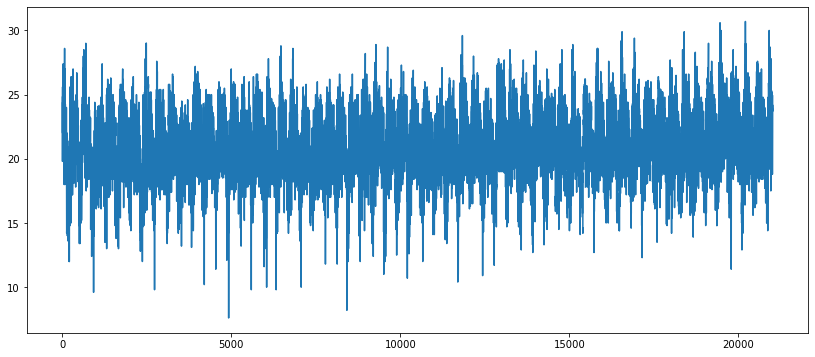

In [9]:
plt.figure(figsize=(14,6))
df['TempBulboSeco'].plot()